# [실습] Python을 활용한 AI 모델링 - 딥러닝 파트
+ 이번시간에는 Python을 활용한 AI 모델링에서 딥러닝에 대해 실습해 보겠습니다.
+ 여기서는 딥러닝 모델 DNN, CNN, RNN 에 대해 코딩하여 모델 구축해 보겠습니다.
+ 한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다. 
+ 이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

## 학습목차
1. 실습준비
2. 딥러닝 모델(DNN, CNN, RNN) 프로세스
 - 데이터 가져오기
 - 데이터 전처리
 - Train, Test 데이터셋 분할
 - 데이터 정규화
 - 딥러닝 모델 : DNN, CNN, RNN

# 
# 1. 실습준비

In [1]:
# 코드실행시 경고 메시지 무시

import warnings
warnings.filterwarnings(action='ignore') 

# 
# 2. 딥러닝 모델(DNN, CNN, RNN) 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

## ① 라이브러리 임포트

##### 필요 라이브러리 임포트

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ② 데이터 로드

#### cust_data.csv 파일 컬럼명
+ 고객등급(class), 성별(sex), 나이(age), 사용서비스수(service), 서비스중지여부 (stop), 미납여부(npay)
+ 3개월 평균 요금(avg_bill), A서비스 3개월 평균요금(A_bill), B서비스 3개월 평균요금(B_bill), 해지여부(termination)

##### <font color=blue> **[문제] 같은 폴더내에 있는 cust_data.csv 파일을 Pandas read_csv 함수를 이용하여 읽어 df 변수에 저장하세요.** </font>

In [3]:
# 읽어 들일 파일명 : cust_data.csv
# Pandas read_csv 함수 활용
# 결과 : df 저장

df = pd.read_csv('cust_data.csv')

## ③ 데이터 분석

In [4]:
# 12컬럼, 7814 라인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        7814 non-null   object 
 1   sex          7814 non-null   object 
 2   age          7814 non-null   int64  
 3   service      7814 non-null   int64  
 4   stop         7814 non-null   object 
 5   npay         7814 non-null   object 
 6   avg_bill     7814 non-null   float64
 7   A_bill       7814 non-null   float64
 8   B_bill       7814 non-null   float64
 9   termination  7814 non-null   object 
 10  by_age       7814 non-null   int64  
 11  bill_rating  7814 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 732.7+ KB


In [5]:
df.tail()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination,by_age,bill_rating
7809,C,M,76,1,N,N,1860.0000,1716.000000,0.0000,N,75,low
7810,C,F,15,1,N,Y,1296.0999,194.414985,643.1001,N,15,low
7811,G,M,12,1,N,N,13799.6666,2069.949990,10605.9266,N,10,midhigh
7812,C,F,40,0,N,N,3140.0000,942.000000,1884.0000,Y,40,low
7813,C,F,59,1,N,N,2436.9000,365.535000,1839.9000,N,55,low


<AxesSubplot:>

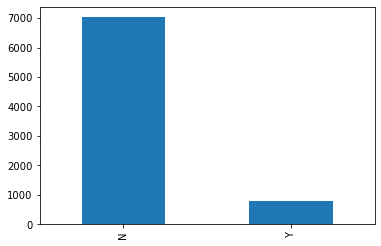

In [6]:
# termination 레이블 불균형 
df['termination'].value_counts().plot(kind='bar')

## ④ 데이터 전처리

+ Object 컬럼에 대해 Pandas get_dummies 함수 활용하여 One-Hot-Encoding

In [10]:
cal_cols = ['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating']

##### <font color=blue> **[문제] ['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating'] 컬럼에 대해 One-Hot-Encoding 수행하고 그 결과를 df1 변수에 저장하세요.** </font>

In [11]:
# ['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating'] : cal_cols 변수에 대해 One-Hot-Endcoding 수행
# One-Hot-Endcoding 수행 : pandas get_dummies() 함수 이용
# get_dummies() 함수 옵션 : data=df, columns=cal_cols, drop_first=True
# 결과 : df1 저장


df1 = pd.get_dummies(data=df, columns=cal_cols, drop_first=True)

In [12]:
# 19컬럼, 7814 라인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7814 non-null   int64  
 1   service              7814 non-null   int64  
 2   avg_bill             7814 non-null   float64
 3   A_bill               7814 non-null   float64
 4   B_bill               7814 non-null   float64
 5   by_age               7814 non-null   int64  
 6   class_D              7814 non-null   uint8  
 7   class_E              7814 non-null   uint8  
 8   class_F              7814 non-null   uint8  
 9   class_G              7814 non-null   uint8  
 10  class_H              7814 non-null   uint8  
 11  sex_M                7814 non-null   uint8  
 12  stop_Y               7814 non-null   uint8  
 13  npay_Y               7814 non-null   uint8  
 14  termination_Y        7814 non-null   uint8  
 15  bill_rating_low      7814 non-null   u

## ⑤ Train, Test  데이터셋 분할

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df1.drop('termination_Y', axis=1).values
y = df1['termination_Y'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=42)

In [16]:
X_train.shape

(5469, 18)

In [17]:
y_train.shape

(5469,)

## ⑥ 데이터 정규화/스케일링(Normalizing/Scaling)

In [18]:
# 숫자 분포 이루어진 컬럼 확인
df1.tail()

,age,service,avg_bill,A_bill,B_bill,by_age,class_D,class_E,class_F,class_G,class_H,sex_M,stop_Y,npay_Y,termination_Y,bill_rating_low,bill_rating_lowmid,bill_rating_mid,bill_rating_midhigh
7809,76,1,1860.0000,1716.000000,0.0000,75,0,0,0,0,0,1,0,0,0,1,0,0,0
7810,15,1,1296.0999,194.414985,643.1001,15,0,0,0,0,0,0,0,1,0,1,0,0,0
7811,12,1,13799.6666,2069.949990,10605.9266,10,0,0,0,1,0,1,0,0,0,0,0,0,1
7812,40,0,3140.0000,942.000000,1884.0000,40,0,0,0,0,0,0,0,0,1,1,0,0,0
7813,59,1,2436.9000,365.535000,1839.9000,55,0,0,0,0,0,0,0,0,0,1,0,0,0


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train[:2]

array([[0.38      , 0.33333333, 0.4295439 , 0.06384702, 0.41944434,
        0.4       , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.58      , 0.11111111, 0.20111297, 0.38498933, 0.        ,
        0.6       , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        ]])

+ 모델 입력갯수, 출력갯수 확인

#### 
## ⑦ 딥러닝 심층신경망(DNN) 모델 구현

#### 
### 라이브러리 임포트

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

#### 
### 하이퍼파라미터 설정 : batch_size, epochs

In [26]:
batch_size = 16
epochs = 20

#### 
### 모델 입력(features) 갯수 확인

In [27]:
X_train.shape

(5469, 18)

#### 
### 모델 출력(label) 갯수 확인

In [28]:
y_train.shape

(5469,)

###  
## 1) DNN

#### 
#### A. 이진 분류용 DNN layer
+ 18개 input layer
+ unit 4개 hidden layer
+ unit 3개 hidden layer 
+ 1개 output layser : 이진분류

![hidden Layer](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer1.PNG)
+ [출처] https://subscription.packtpub.com/book/data/9781788995207/1/ch01lvl1sec03/deep-learning-intuition

##### <font color=blue> **[문제] 요구사항대로 Sequential 모델을 만들어 보세요.** </font>

In [29]:
# Sequential() 모델 정의 하고 model로 저장
# input layer는 input_shape=() 옵션을 사용한다.
# 18개 input layer
# unit 4개 hidden layer
# unit 3개 hidden layer 
# 1개 output layser : 이진분류

model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(18,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### 모델 확인

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 76        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


+ Dropout : 과적합 방지

![dropout](https://github.com/gzone2000/TEMP_TEST/raw/master/dropout.PNG)
+ [출처] https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

In [31]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(18,)))
model.add(Dropout(0.3))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

#### 
### 과적합 방지 모델 확인

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 76        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


#### 모델 컴파일 – 이진 분류 모델

In [33]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

#### 모델 컴파일 – 이진 분류 모델

In [34]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

- 모델 컴파일 – 다중 분류 모델 (Y값을 One-Hot-Encoding 한경우) <br>
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

- 모델 컴파일 – 다중 분류 모델  (Y값을 One-Hot-Encoding 하지 않은 경우) <br>
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

- 모델 컴파일 – 예측 모델
model.compile(optimizer='adam', loss='mse')

#### 모델 훈련(학습) 하기

##### <font color=blue> **[문제] 요구사항대로 DNN 모델을 학습시키세요.** </font>
+ 모델 이름 : model
+ epoch : 10번
+ batch_size : 10번

In [35]:
# 앞쪽에서 정의된 모델 이름 : model
# Sequential 모델의 fit() 함수 사용
# @인자
### X, y : X_train, y_train
### validation_data=(X_test, y_test)
### epochs 10번
### batch_size 10번


model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=10, 
          batch_size=10)

Epoch 1/10
547/547 [==============================] - 2s 2ms/step - loss: 0.4173 - accuracy: 0.8991 - val_loss: 0.3125 - val_accuracy: 0.8994
Epoch 2/10
547/547 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8996 - val_loss: 0.2988 - val_accuracy: 0.8994
Epoch 3/10
547/547 [==============================] - 1s 2ms/step - loss: 0.3196 - accuracy: 0.8996 - val_loss: 0.2839 - val_accuracy: 0.8994
Epoch 4/10
547/547 [==============================] - 1s 2ms/step - loss: 0.3041 - accuracy: 0.8996 - val_loss: 0.2638 - val_accuracy: 0.8994
Epoch 5/10
547/547 [==============================] - 1s 2ms/step - loss: 0.2838 - accuracy: 0.8996 - val_loss: 0.2491 - val_accuracy: 0.8994
Epoch 6/10
547/547 [==============================] - 1s 1ms/step - loss: 0.2709 - accuracy: 0.8996 - val_loss: 0.2334 - val_accuracy: 0.8994
Epoch 7/10
547/547 [==============================] - 1s 2ms/step - loss: 0.2547 - accuracy: 0.8996 - val_loss: 0.2210 - val_accuracy: 0.8994
Epoch 

#### 
#### B. 다중 분류용 DNN layer
+ 18개 input layer
+ unit 5개 hidden layer
+ dropout
+ unit 4개 hidden layer 
+ dropout
+ 2개 output layser : 이진분류

![다중분류](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer2.PNG)
+ [출처] https://www.educba.com/dnn-neural-network/

In [36]:
# 18개 input layer
# unit 5개 hidden layer
# dropout
# unit 4개 hidden layer 
# dropout
# 2개 output layser : 다중분류

model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(18,)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

#### 
### 모델 확인

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 95        
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 4)                 24        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


#### 모델 컴파일 – 다중 분류 모델

In [38]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

#### 모델 훈련(학습) 하기

In [39]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, 
          batch_size=16)

Epoch 1/20
342/342 [==============================] - 2s 2ms/step - loss: 0.4153 - accuracy: 0.8945 - val_loss: 0.2868 - val_accuracy: 0.8994
Epoch 2/20
342/342 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.8996 - val_loss: 0.2660 - val_accuracy: 0.8994
Epoch 3/20
342/342 [==============================] - 1s 2ms/step - loss: 0.2914 - accuracy: 0.8996 - val_loss: 0.2528 - val_accuracy: 0.8994
Epoch 4/20
342/342 [==============================] - 0s 1ms/step - loss: 0.2829 - accuracy: 0.8996 - val_loss: 0.2426 - val_accuracy: 0.8994
Epoch 5/20
342/342 [==============================] - 1s 2ms/step - loss: 0.2633 - accuracy: 0.8996 - val_loss: 0.2315 - val_accuracy: 0.8994
Epoch 6/20
342/342 [==============================] - 1s 2ms/step - loss: 0.2573 - accuracy: 0.8996 - val_loss: 0.2212 - val_accuracy: 0.8994
Epoch 7/20
342/342 [==============================] - 1s 2ms/step - loss: 0.2437 - accuracy: 0.8996 - val_loss: 0.2114 - val_accuracy: 0.8994
Epoch 

#### 
### Callback : 조기종료, 모델 저장

In [40]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [41]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', 
                           verbose=1, patience=5)

In [42]:
check_point = ModelCheckpoint('best_model.h5', verbose=1,
                              monitor='val_loss', mode='min', 
                              save_best_only=True)

#### 
### 모델 학습

In [43]:
history = model.fit(x=X_train, y=y_train, 
          epochs=50 , batch_size=20,
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop, check_point])

Epoch 1/50
258/274 [===========================>..] - ETA: 0s - loss: 0.1831 - accuracy: 0.8988
Epoch 1: val_loss improved from inf to 0.13845, saving model to best_model.h5
274/274 [==============================] - 1s 2ms/step - loss: 0.1833 - accuracy: 0.8996 - val_loss: 0.1384 - val_accuracy: 0.8994
Epoch 2/50
267/274 [============================>.] - ETA: 0s - loss: 0.1820 - accuracy: 0.8991
Epoch 2: val_loss improved from 0.13845 to 0.13704, saving model to best_model.h5
274/274 [==============================] - 0s 2ms/step - loss: 0.1807 - accuracy: 0.8996 - val_loss: 0.1370 - val_accuracy: 0.8994
Epoch 3/50
233/274 [========================>.....] - ETA: 0s - loss: 0.1762 - accuracy: 0.9013
Epoch 3: val_loss improved from 0.13704 to 0.13540, saving model to best_model.h5
274/274 [==============================] - 1s 2ms/step - loss: 0.1788 - accuracy: 0.8996 - val_loss: 0.1354 - val_accuracy: 0.8994
Epoch 4/50
240/274 [=========================>....] - ETA: 0s - loss: 0.1854 

274/274 [==============================] - 1s 2ms/step - loss: 0.1552 - accuracy: 0.9468 - val_loss: 0.1194 - val_accuracy: 0.9727
Epoch 29/50
258/274 [===========================>..] - ETA: 0s - loss: 0.1519 - accuracy: 0.9467
Epoch 29: val_loss improved from 0.11783 to 0.11733, saving model to best_model.h5
274/274 [==============================] - 0s 2ms/step - loss: 0.1534 - accuracy: 0.9457 - val_loss: 0.1173 - val_accuracy: 0.9736
Epoch 30/50
273/274 [============================>.] - ETA: 0s - loss: 0.1514 - accuracy: 0.9465
Epoch 30: val_loss did not improve from 0.11733
274/274 [==============================] - 1s 2ms/step - loss: 0.1513 - accuracy: 0.9466 - val_loss: 0.1175 - val_accuracy: 0.9748
Epoch 31/50
269/274 [============================>.] - ETA: 0s - loss: 0.1680 - accuracy: 0.9396
Epoch 31: val_loss did not improve from 0.11733
274/274 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.9400 - val_loss: 0.1194 - val_accuracy: 0.9744
Epoch 

## ⑧ 모델 성능 평가

In [44]:
losses = pd.DataFrame(model.history.history)

In [45]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.183293,0.899616,0.138447,0.899360
1,0.180710,0.899616,0.137039,0.899360
2,0.178801,0.899616,0.135403,0.899360
3,0.183290,0.907296,0.132933,0.960341
4,0.168623,0.936003,0.130740,0.968444


+ 성능 시각화

<AxesSubplot:>

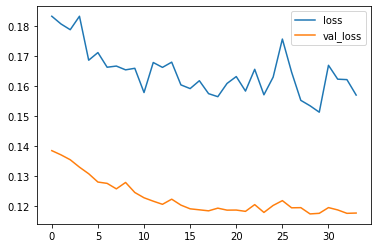

In [46]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

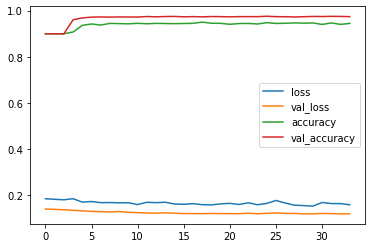

In [48]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

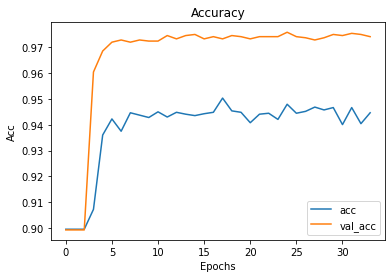

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

## 
## 배운 내용 정리
1. 딥러닝 심층신경망(DNN) 모델 프로세스
 + 데이터 가져오기
 + 데이터 전처리
 + Train, Test 데이터셋 분할
 + 데이터 정규화
 + DNN 딥러닝 모델

---

###  
## 2) CNN

![CNN](https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg)
+ [출처] https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53


+ CNN은 이미지 처리에 높은 성능을 보여주고 있어 DNN에서 다뤄던 Tabular 형태의 데이터를 가지고 테스트 진행하기 어려워
+ 따로 이미지 준비하여 CNN 실습을 진행하겠습니다.

#### 업로드된 이미지 파일 가져오기

In [50]:
import os
from glob import glob
import tensorflow as tf

In [ ]:
# dataset-clean,dirty.zip 파일 확인
FILENAME = 'dataset-clean_dirty.zip'
glob(FILENAME)

In [ ]:
# dataset-clean_dirty.zip 파일을 IMAGE 디렉토리로 복사 및 압축 풀기
if not os.path.exists('IMAGE') :
    !mkdir IMAGE
    !cp dataset-clean_dirty.zip ./IMAGE
    !cd IMAGE ; unzip dataset-clean_dirty.zip

In [ ]:
# ./IMAGE/clean 폴더 안의 이미지 갯수
!ls -l ./IMAGE/clean | grep jpg | wc -l

In [ ]:
# ./IMAGE/clean 폴더 안의 이미지 갯수
!ls -l ./IMAGE/dirty | grep jpg | wc -l

#### 이미지 파일 하나 읽어 이미지 보기

In [ ]:
clean_img_path = './IMAGE/clean/plastic1.jpg'

In [ ]:
gfile = tf.io.read_file(clean_img_path)
image = tf.io.decode_image(gfile, dtype=tf.float32)

In [ ]:
image.shape

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
dirty_img_path = './IMAGE/dirty/dirty_plastic1.jpg'

In [ ]:
gfile = tf.io.read_file(dirty_img_path)
image = tf.io.decode_image(gfile, dtype=tf.float32)

In [ ]:
image.shape

In [ ]:
plt.imshow(image)
plt.show()

#### Data Preprocess
+ tensorflow ImageDataGenerator 함수 활용하여 이미지 데이터 스케일 및 트레인 데이터/ 테스트 데이트 나누기
+ flow_from_directory 함수 활용하여 나누어진 트레인 데이터와 테스트 데이터에 대해 배치 사이즈 나누고 , 셔플하고 labeling 수행

In [ ]:
# Hyperparameter Tunning

num_epochs = 50 
batch_size = 4
learning_rate = 0.001

input_shape = (384, 512, 3)  # 사이즈 확인
num_classes = 2    # clean, dirty

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# ImageDataGenerator 이용하여 이미지 전처리하기

training_datagen = ImageDataGenerator(
      rescale=1. / 255,
      validation_split=0.2     # train set : 435 * (1 - 0.2) = 348
    )

test_datagen = ImageDataGenerator(
      rescale=1./255,
      validation_split=0.2     # test set : 435 * 0.2 = 87
    )

In [ ]:
# 이미지 데이터 읽고 배치 , 셔플하고 labeling 수행

# IMAGE 포더 밑에 .ipynb_checkpoints 폴더 있을경우 폴데 삭제
!rm -rf ./IMAGE/.ipynb_checkpoints

training_generator = training_datagen.flow_from_directory(
    './IMAGE/',
    batch_size=batch_size, 
    target_size=(384, 512),       # 사이즈 확인
    class_mode = 'categorical',   # binary , categorical
    shuffle = True,
    subset = 'training'           # training, validation. validation_split 사용하므로 subset 지정
    )

test_generator = test_datagen.flow_from_directory(
    './IMAGE/',
    batch_size=batch_size, 
    target_size=(384, 512),       # 사이즈 확인
    class_mode = 'categorical',   # binary , categorical
    shuffle = True,
    subset = 'validation'         # training, validation. validation_split 사용하므로 subset 지정
    )

In [ ]:
# class 이름 및 번호 매핑 확인
print(training_generator.class_indices)

In [ ]:
batch_samples = next(iter(training_generator))

print('True Value : ',batch_samples[1][0])
plt.imshow(batch_samples[0][0])   
plt.show()

#### CNN 모델링

In [51]:
#CNN 라이브러리 임포트

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
# Feature extraction
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Classification
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

#### 모델 컴파일 – 이진 분류 모델

In [ ]:
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

#### 모델 훈련(학습) 하기

In [ ]:
history = model.fit(training_generator, 
          epochs=3 ,
          steps_per_epoch = len(training_generator) / batch_size,
          validation_steps = len(test_generator) / batch_size,
          validation_data=test_generator, 
          verbose=1
)

#### **성능 시각화 - 성능평가**

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

#### **예측하기**

In [ ]:
# test_generator 샘플 데이터 가져오기
# 배치 사이즈 32 확인

batch_img, batch_label = next(iter(test_generator))
print(batch_img.shape)
print(batch_label.shape)

In [ ]:
# 4개 Test 샘플 이미지 그려보고 예측해 보기

i = 1 
plt.figure(figsize=(16, 30))
for img, label in list(zip(batch_img, batch_label)):
    pred = model.predict(img.reshape(-1,384, 512,3))
    pred_t = np.argmax(pred)
    plt.subplot(8, 4, i)
    plt.title(f'True Value:{np.argmax(label)}, Pred Value: {pred_t}')
    plt.imshow(img)   
    i = i + 1

---

###  
## 3) RNN 

![RNN](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/1200px-Recurrent_neural_network_unfold.svg.png)
+ [출처] https://en.wikipedia.org/wiki/File:Recurrent_neural_network_unfold.svg


+ RNN은 주로 시계열 처리나 자연어 처리에 사용됩니다.
+ 우리 실습에 시계열 데이터나 자연어 관련 데이터가 없어 DNN에서 사용한 Tabular 데이터를 가지고 RNN 실습하도록 하겠습니다.

#### RNN 모델링

In [ ]:
#RNN 라이브러리 임포트

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import LSTM

In [ ]:
X_train.shape, X_test.shape

In [ ]:
X_train = X_train.reshape(-1,18,1)
X_test = X_test.reshape(-1,18,1)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
# define model
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(18, 1)))
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

#### **모델 컴파일 – 이진 분류 모델**

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

#### **모델 학습**

In [ ]:
history = model.fit(x=X_train, y=y_train, 
          epochs=10 , batch_size=128,
          validation_data=(X_test, y_test), 
          verbose=1
)

#### 성능 시각화 - 성능평가

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

---

## 배운 내용 정리
1. 딥러닝 모델 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가
2. 딥러닝 모델 DNN, CNN, RNN 모델 구축